## RF PatternTraces

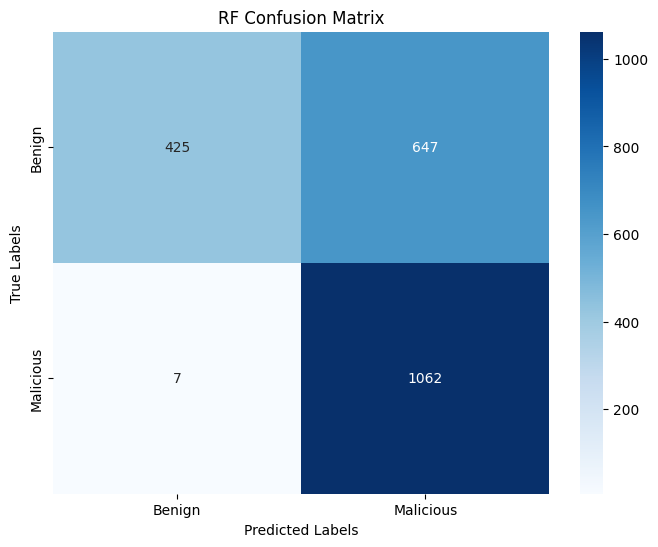

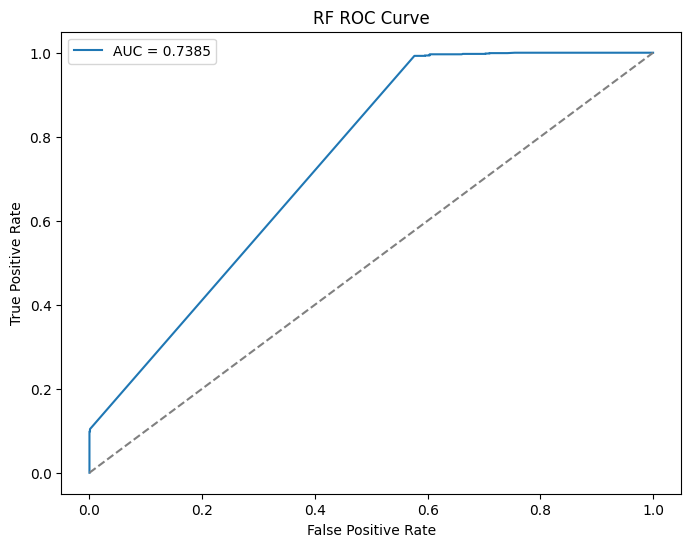

Train Accuracy: 0.74762238
Validation Accuracy: 0.71975712
Test Accuracy: 0.69453526
Precision: 0.80286005
Recall: 0.69453526
F1 Score: 0.66472949
ROC AUC: 0.73853109
Cohen's Kappa: 0.38958069
Training Time (s): 45.13730597
Validation Time (s): 0.10663509
Test Time (s): 0.11614513
Model saved at: RF_best_model_ngrams.pkl


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Total_Dependencies',
                       'Direct_Dependencies',
                       'Indirect_Dependencies'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model and record training time
start_train_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
rf_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
rf_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'RF_best_model_ngrams.pkl'
joblib.dump(rf_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('RF Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('RF ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('RF ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## DT PatternTraces

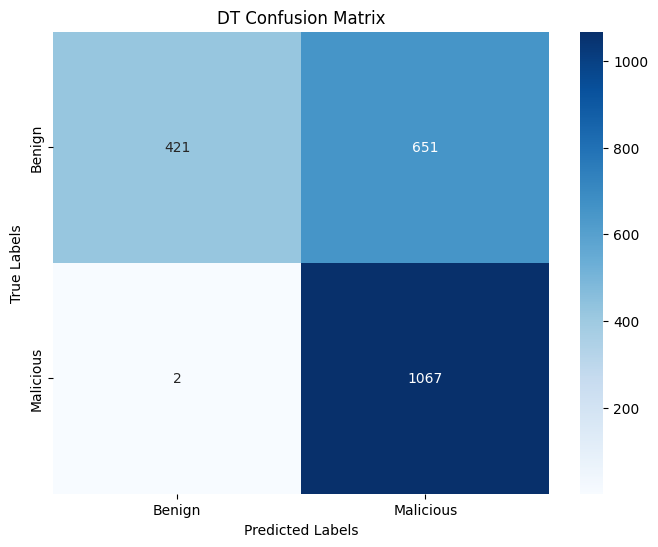

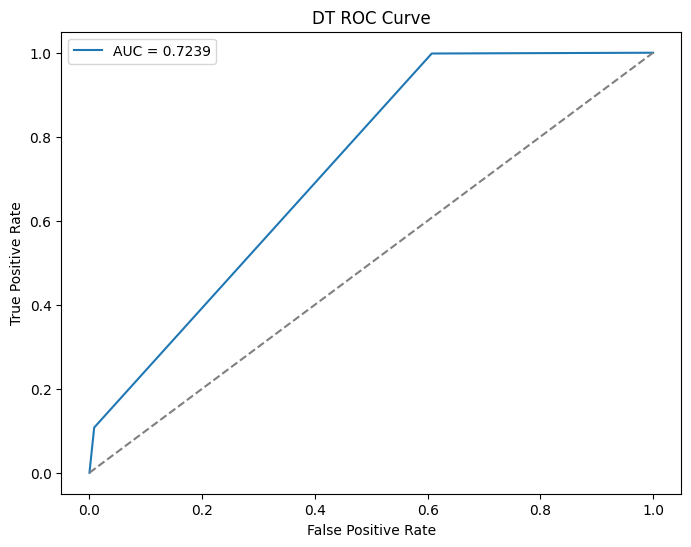

Train Accuracy: 0.74762238
Validation Accuracy: 0.71275105
Test Accuracy: 0.69500234
Precision: 0.80843361
Recall: 0.69500234
F1 Score: 0.66431243
ROC AUC: 0.72389849
Cohen's Kappa: 0.39052123
Training Time (s): 2.26889896
Validation Time (s): 0.00570273
Test Time (s): 0.00499487
Model saved at: DT_best_model_ngrams.pkl


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Total_Dependencies',
                       'Direct_Dependencies',
                       'Indirect_Dependencies'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = dt_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
dt_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
dt_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'DT_best_model_ngrams.pkl'
joblib.dump(dt_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('DT Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('DT ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('DT ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## SVM PatternTraces

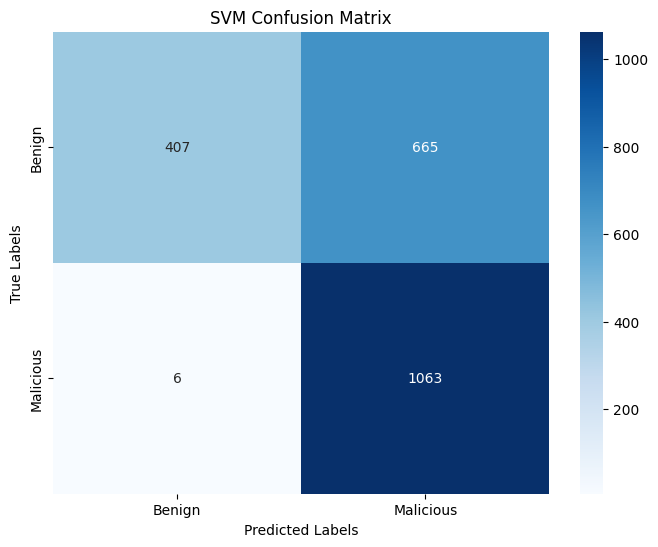

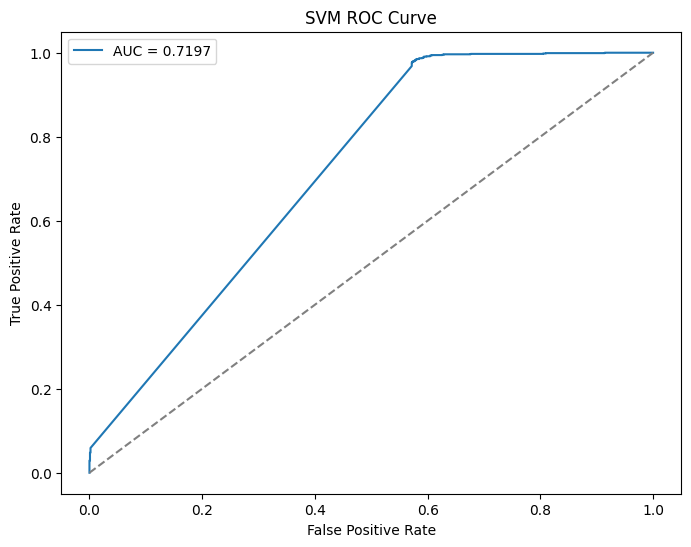

Train Accuracy: 0.74752227
Validation Accuracy: 0.70714619
Test Accuracy: 0.68659505
Precision: 0.80057654
Recall: 0.68659505
F1 Score: 0.65397563
ROC AUC: 0.71973301
Cohen's Kappa: 0.37372908
Training Time (s): 8.84932518
Validation Time (s): 0.14624596
Test Time (s): 0.14975047
Model saved at: SVM_best_model_ngrams.pkl


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Total_Dependencies',
                       'Direct_Dependencies',
                       'Indirect_Dependencies'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SVM model with probability=True for AUC/ROC calculations
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model and record training time
start_train_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = svm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
svm_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
svm_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'SVM_best_model_ngrams.pkl'
joblib.dump(svm_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('SVM Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('SVM ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## LR PatternTraces

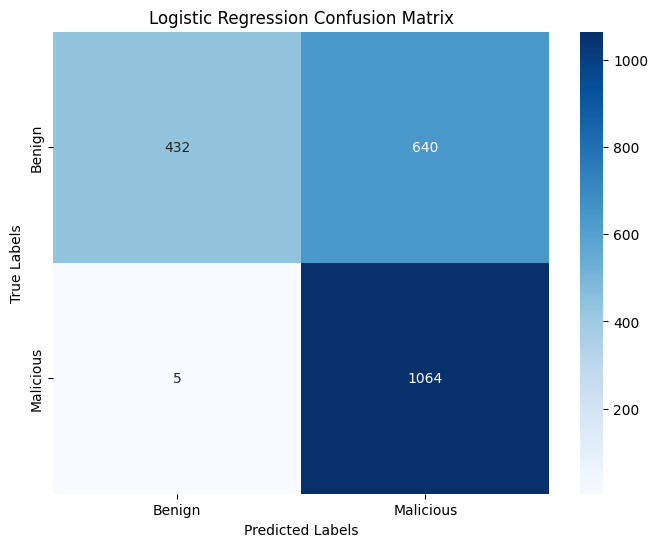

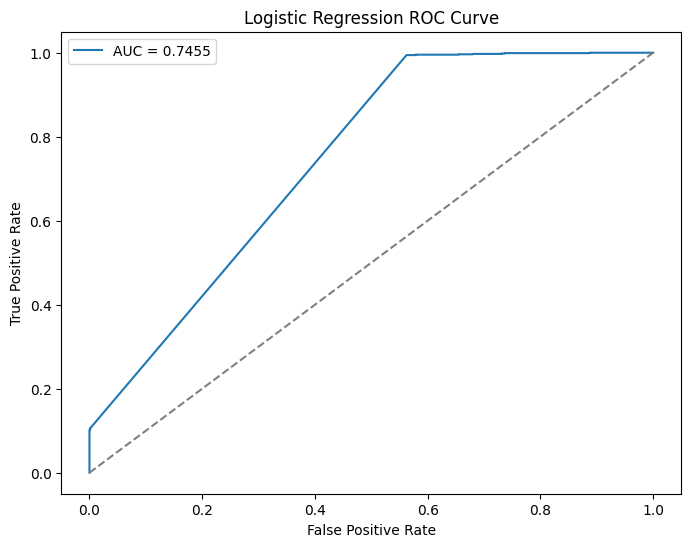

Train Accuracy: 0.74742216
Validation Accuracy: 0.72069127
Test Accuracy: 0.69873891
Precision: 0.80674087
Recall: 0.69873891
F1 Score: 0.66984577
ROC AUC: 0.74549507
Cohen's Kappa: 0.39797702
Training Time (s): 0.53990030
Validation Time (s): 0.00000000
Test Time (s): 0.00000000
Model saved at: LR_best_model_ngrams.pkl


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Total_Dependencies',
                       'Direct_Dependencies',
                       'Indirect_Dependencies'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model and record training time
start_train_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = lr_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
lr_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
lr_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'LR_best_model_ngrams.pkl'
joblib.dump(lr_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Logistic Regression Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic Regression ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## KNN Pattern Traces

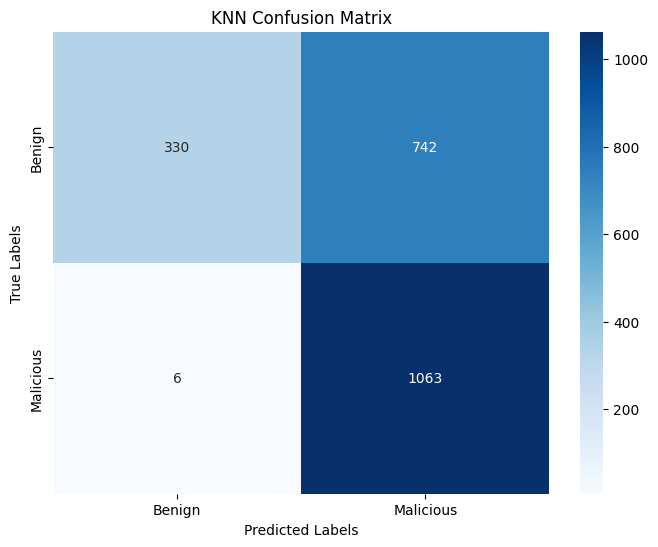

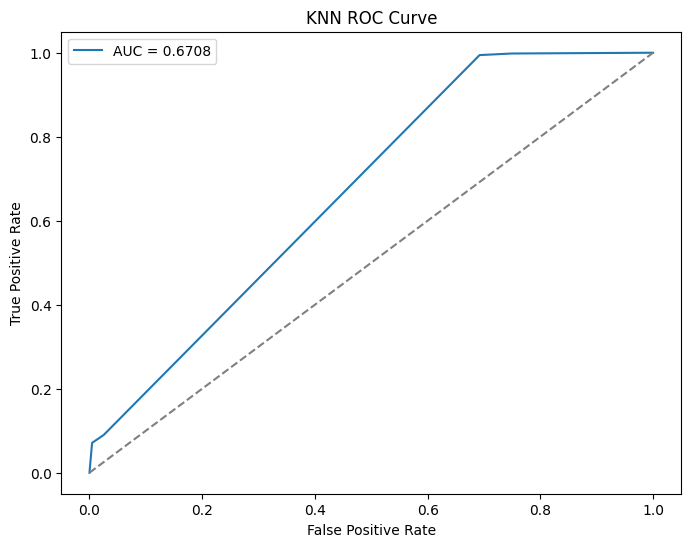

Train Accuracy: 0.68985884
Validation Accuracy: 0.66837926
Test Accuracy: 0.65063055
Precision: 0.78580676
Recall: 0.65063055
F1 Score: 0.60405293
ROC AUC: 0.67076960
Cohen's Kappa: 0.30193222
Training Time (s): 0.00100279
Validation Time (s): 0.35909247
Test Time (s): 0.32734895
Model saved at: KNN_best_model_ngrams.pkl


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Total_Dependencies',
                       'Direct_Dependencies',
                       'Indirect_Dependencies'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model and record training time
start_train_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = knn_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
knn_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
knn_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'KNN_best_model_ngrams.pkl'
joblib.dump(knn_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('KNN Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('KNN ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## GB Pattern Traces

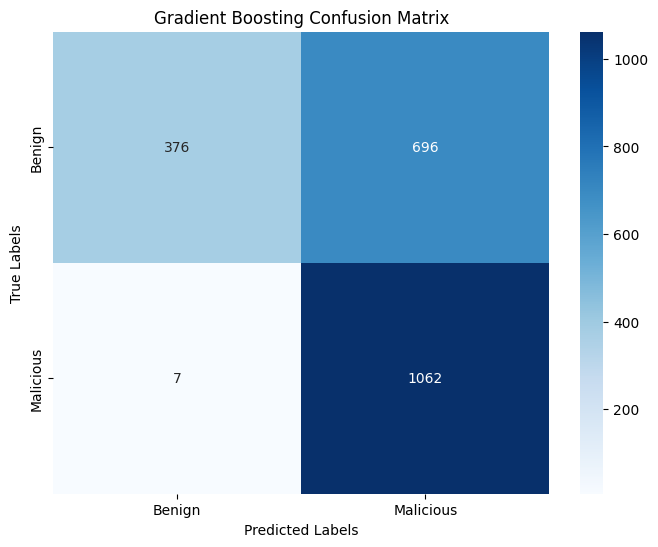

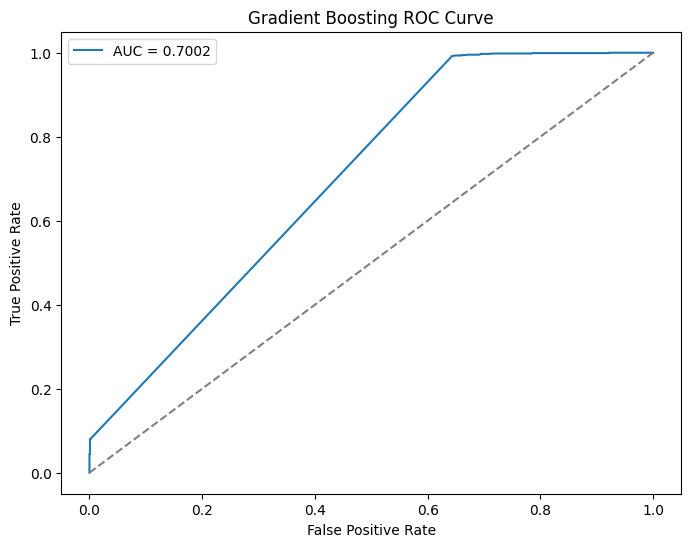

Train Accuracy: 0.68905796
Validation Accuracy: 0.69733769
Test Accuracy: 0.67164876
Precision: 0.79317397
Recall: 0.67164876
F1 Score: 0.63391821
ROC AUC: 0.70017618
Cohen's Kappa: 0.34388795
Training Time (s): 111.16081953
Validation Time (s): 0.00300622
Test Time (s): 0.00401855
Model saved at: GB_best_model_ngrams.pkl


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Total_Dependencies',
                       'Direct_Dependencies',
                       'Indirect_Dependencies'
]

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
gb_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = gb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
gb_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
gb_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'GB_best_model_ngrams.pkl'
joblib.dump(gb_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Gradient Boosting Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Gradient Boosting ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


In [9]:
# Updated metrics for new data
updated_metrics = {
     "Model": ["Random Forest", "Decision Tree", "SVM", "Logistic Regression", "KNN", "Gradient Boosting"],
    "Train Accuracy": [0.74762238, 0.74762238, 0.74752227, 0.74742216, 0.68985884, 0.68905796],
    "Validation Accuracy": [0.71975712, 0.71275105, 0.70714619, 0.72069127, 0.66837926, 0.69733769],
    "Test Accuracy": [0.69453526, 0.69500234, 0.68659505, 0.69873891, 0.65063055, 0.67164876],
    "Precision": [0.80286005, 0.80843361, 0.80057654, 0.80674087, 0.78580676, 0.79317397],
    "Recall": [0.69453526, 0.69500234, 0.68659505, 0.69873891, 0.65063055, 0.67164876],
    "F1 Score": [0.66472949, 0.66431243, 0.65397563, 0.66984577, 0.60405293, 0.63391821],
    "ROC AUC": [0.73853109, 0.72389849, 0.71973301, 0.74549507, 0.67076960, 0.70017618],
    "Cohen's Kappa": [0.38958069, 0.39052123, 0.37372908, 0.39797702, 0.30193222, 0.34388795],
    "Training Time (s)": [45.13730597, 2.26889896, 8.84932518, 0.53990030, 0.00100279, 111.16081953],
    "Validation Time (s)": [0.10663509, 0.00570273, 0.14624596, 0.00000000, 0.35909247, 0.00300622],
    "Test Time (s)": [0.11614513, 0.00499487, 0.14975047, 0.00000000, 0.32734895, 0.00401855],
}

# Convert the dictionary to a DataFrame
updated_results_df = pd.DataFrame(updated_metrics)

# Save the DataFrame to a CSV file
updated_csv_file_path = "model_comparison_results.csv"
updated_results_df.to_csv(updated_csv_file_path, index=False)
updated_results_df

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen's Kappa,Training Time (s),Validation Time (s),Test Time (s)
0,Random Forest,0.747622,0.719757,0.694535,0.802860,0.694535,0.664729,0.738531,0.389581,45.137306,0.106635,0.116145
1,Decision Tree,0.747622,0.712751,0.695002,0.808434,0.695002,0.664312,0.723898,0.390521,2.268899,0.005703,0.004995
2,SVM,0.747522,0.707146,0.686595,0.800577,0.686595,0.653976,0.719733,0.373729,8.849325,0.146246,0.149750
3,Logistic Regression,0.747422,0.720691,0.698739,0.806741,0.698739,0.669846,0.745495,0.397977,0.539900,0.000000,0.000000
4,KNN,0.689859,0.668379,0.650631,0.785807,0.650631,0.604053,0.670770,0.301932,0.001003,0.359092,0.327349
5,Gradient Boosting,0.689058,0.697338,0.671649,0.793174,0.671649,0.633918,0.700176,0.343888,111.160820,0.003006,0.004019


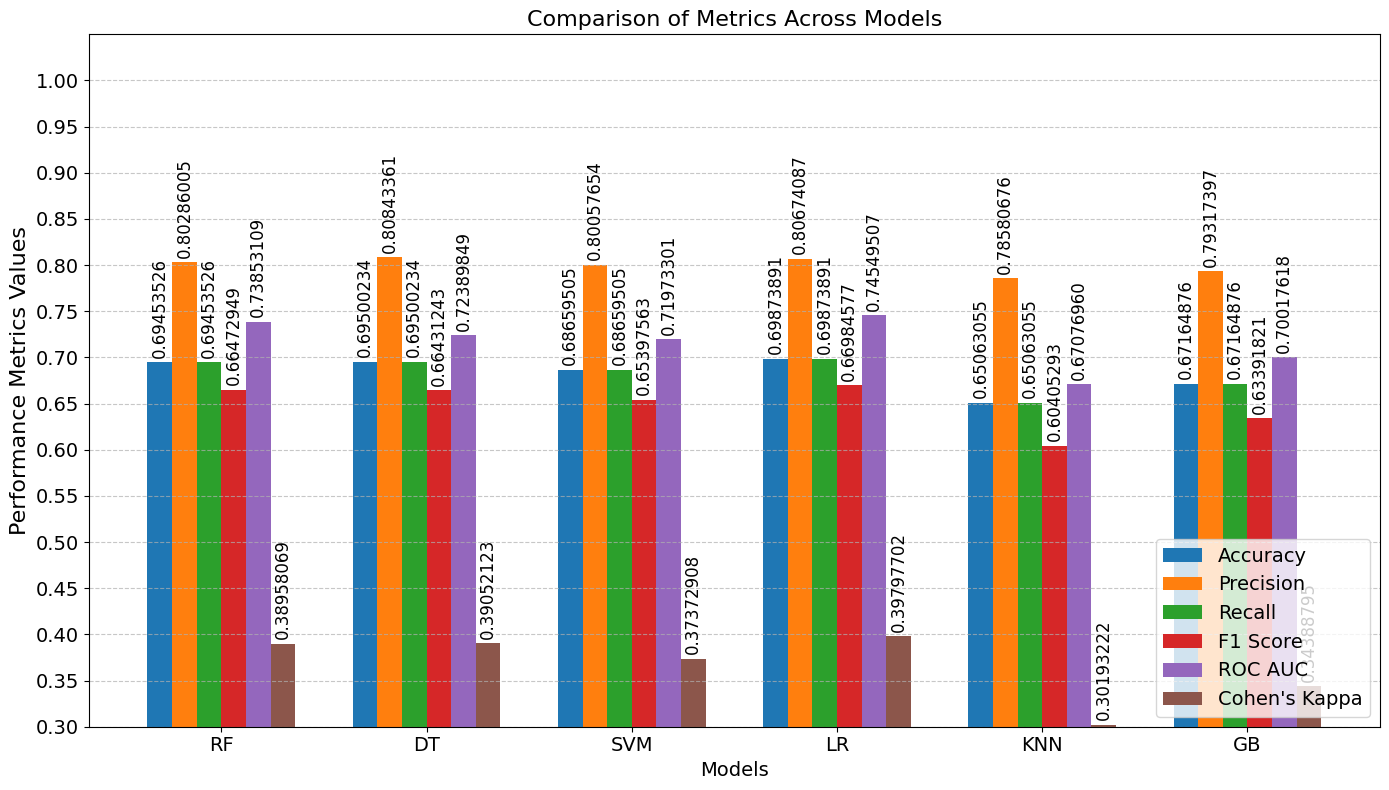

In [13]:
# Re-importing necessary libraries and re-defining the data
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    "Accuracy": [0.69453526, 0.69500234, 0.68659505, 0.69873891, 0.65063055, 0.67164876],
    "Precision": [0.80286005, 0.80843361, 0.80057654, 0.80674087, 0.78580676, 0.79317397],
    "Recall": [0.69453526, 0.69500234, 0.68659505, 0.69873891, 0.65063055, 0.67164876],
    "F1 Score": [0.66472949, 0.66431243, 0.65397563, 0.66984577, 0.60405293, 0.63391821],
    "ROC AUC": [0.73853109, 0.72389849, 0.71973301, 0.74549507, 0.67076960, 0.70017618],
    "Cohen's Kappa": [0.38958069, 0.39052123, 0.37372908, 0.39797702, 0.30193222, 0.34388795],
}
models = ["RF", "DT", "SVM", "LR", "KNN", "GB"]

# Bar width and positions
bar_width = 0.12
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for each metric
for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * bar_width, values, bar_width, label=metric)
    # Adding numerical values to each bar (vertically)
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{value:.8f}", 
                ha='center', va='bottom', rotation=90, fontsize=12)

# Customizing the plot
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=0, fontsize=14)
ax.set_title("Comparison of Metrics Across Models", fontsize=16)
ax.set_ylabel("Performance Metrics Values", fontsize=16)  # Increased Y-axis font size
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc="lower right", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Setting the Y-axis to start from 0.5 with intervals of 0.05
ax.set_ylim(0.3, 1.05)
ax.set_yticks(np.arange(0.3, 1.05, 0.05))
ax.tick_params(axis='y', labelsize=14)  # Y-axis tick font size set to 14

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Comparison of Metrics Across Models.png')  # Save the plot
plt.show()